# Modeling의 두 가지 방식
## Deterministic modeling
$$y=f(x)$$
- 위 식과 같이 입력 변수 $x$에 대해 출력이 고정된다.

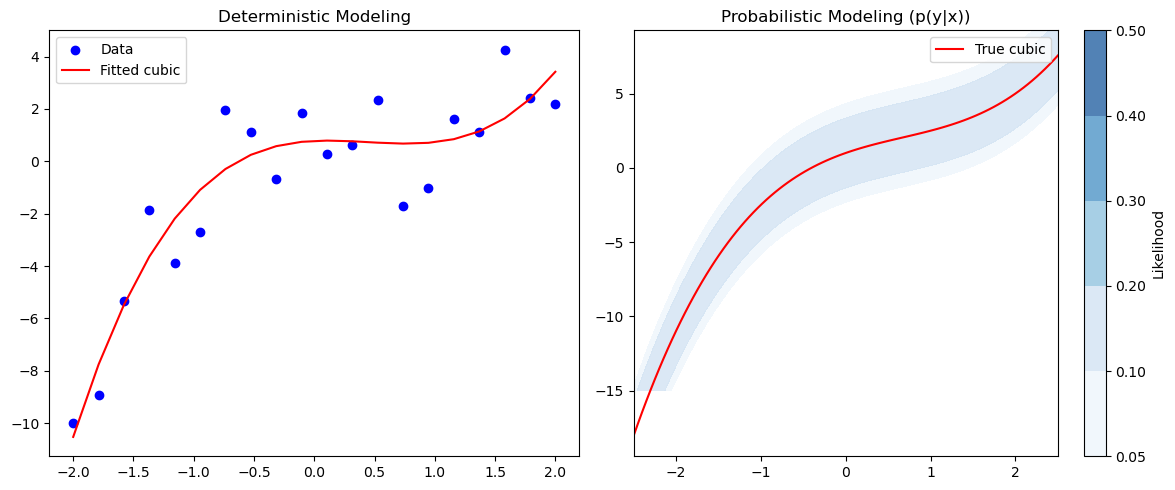

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 3차 함수 정의 및 샘플 생성
np.random.seed(42)
x = np.linspace(-2, 2, 20)
y_true = 0.5 * x**3 - x**2 + 2 * x + 1
noise = np.random.normal(0, 2, size=x.shape)
y = y_true + noise

# 결정적 모델: 3차 다항식 피팅
coeffs = np.polyfit(x, y, 3)
y_pred = np.polyval(coeffs, x)

# 확률적 모델: p(y|x) 분포 시각화
x_grid = np.linspace(-2.5, 2.5, 100)
y_grid = np.linspace(np.min(y)-5, np.max(y)+5, 200)
X, Y = np.meshgrid(x_grid, y_grid)
Y_true_grid = 0.5 * X**3 - X**2 + 2 * X + 1
likelihood = norm.pdf(Y, loc=Y_true_grid, scale=2)

# 그림 그리기
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 왼쪽: 결정적 모델
axes[0].scatter(x, y, color='blue', label='Data')
axes[0].plot(x, y_pred, color='red', label='Fitted cubic')
axes[0].set_title('Deterministic Modeling')
axes[0].legend()

# 오른쪽: 확률적 모델
contour = axes[1].contourf(X, Y, likelihood, levels=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5], cmap='Blues', alpha=0.7)
axes[1].plot(x_grid, 0.5 * x_grid**3 - x_grid**2 + 2 * x_grid + 1, color='red', label='True cubic')
axes[1].set_title('Probabilistic Modeling (p(y|x))')
axes[1].legend()
plt.colorbar(contour, ax=axes[1], label='Likelihood')

plt.tight_layout()
plt.show()

In [2]:
dims = [1, 10, 100, 1000, 10000]
import numpy as np
for dim in dims:
    samples = np.random.normal(0, 1, (1000, dim))
    # calculate the min and max distance from the first point
    distances = np.linalg.norm(samples - samples[0], axis=1)
    min_dist = np.min(distances[distances > 0])
    max_dist = np.max(distances)
    ratio = max_dist / min_dist
    print(f"Dimension: {dim}, Min Dist: {min_dist:.4f}, Max Dist: {max_dist:.4f}, Ratio: {ratio:.4f}")

Dimension: 1, Min Dist: 0.0067, Max Dist: 3.7559, Ratio: 563.3530
Dimension: 10, Min Dist: 1.9202, Max Dist: 7.1733, Ratio: 3.7356
Dimension: 100, Min Dist: 11.9998, Max Dist: 17.3525, Ratio: 1.4461
Dimension: 1000, Min Dist: 41.1901, Max Dist: 46.3023, Ratio: 1.1241
Dimension: 10000, Min Dist: 138.9576, Max Dist: 144.3947, Ratio: 1.0391
